In [11]:
import warnings
import numpy as np
import pandas as pd
# Ignore warnings
warnings.filterwarnings("ignore")

In [12]:
import matplotlib.pyplot as plt
df_train=pd.read_csv(r"C:\Airline passenger satisfaction\train.csv\train.csv")
df_test=pd.read_csv(r"C:\Airline passenger satisfaction\test.csv\test.csv")

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [15]:
df_test['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

In [5]:
df_train=df_train.dropna()
df_test=df_test.dropna()

In [6]:
df_train = df_train.drop(columns=['Unnamed: 0', 'id'])
df_test = df_test.drop(columns=['Unnamed: 0', 'id'])

Evaluation results for Logistic Regression:
Accuracy: 0.8183, Precision: 0.7813, Recall: 0.8137, F1-score: 0.7972


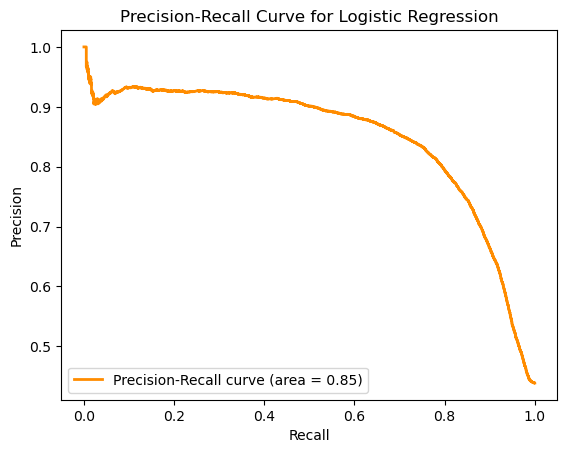

Evaluation results for Decision Tree:
Accuracy: 0.9466, Precision: 0.9372, Recall: 0.9415, F1-score: 0.9393


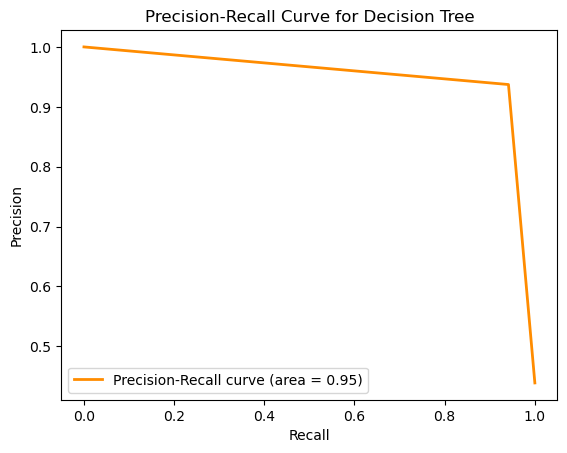

Evaluation results for Random Forest:
Accuracy: 0.9634, Precision: 0.9740, Recall: 0.9418, F1-score: 0.9576


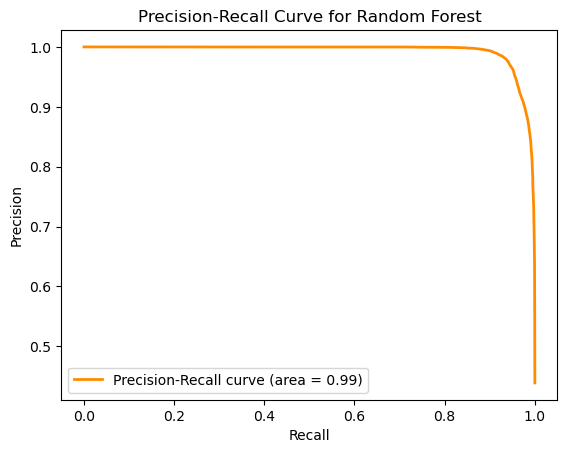

Evaluation results for Neural Network:
Accuracy: 0.9135, Precision: 0.8703, Recall: 0.9434, F1-score: 0.9054


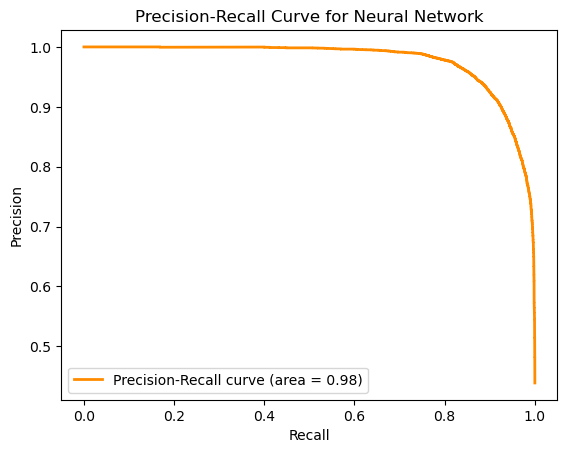

Cross-validation scores for Logistic Regression:
Accuracy: 0.8130 ± 0.0079
Precision: 0.7652 ± 0.0105
Recall: 0.8203 ± 0.0057
F1-score: 0.7918 ± 0.0080
Cross-validation scores for Decision Tree:
Accuracy: 0.9443 ± 0.0022
Precision: 0.9326 ± 0.0019
Recall: 0.9393 ± 0.0036
F1-score: 0.9359 ± 0.0026
Cross-validation scores for Random Forest:
Accuracy: 0.9621 ± 0.0013
Precision: 0.9722 ± 0.0025
Recall: 0.9393 ± 0.0015
F1-score: 0.9555 ± 0.0014
Cross-validation scores for Neural Network:
Accuracy: 0.8816 ± 0.0457
Precision: 0.8736 ± 0.0906
Recall: 0.8763 ± 0.1249
F1-score: 0.8629 ± 0.0587


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
# Encode categorical variables with object datatype
label_encoder = LabelEncoder()
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column] = label_encoder.fit_transform(df_train[column])
        df_test[column] = label_encoder.transform(df_test[column])

# Separate features and target variable
X_train = df_train.drop(columns=['satisfaction'])
y_train = df_train['satisfaction']
X_test = df_test.drop(columns=['satisfaction'])
y_test = df_test['satisfaction']

# Train logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Train decision trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Train random forests
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train neural networks
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)

# Evaluate models on test data
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Neural Network": nn_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Evaluation results for {name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Precision-recall curve
    y_probs = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)

    plt.figure()
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name}')
    plt.legend(loc="lower left")
    plt.show()

# Apply cross-validation to each model
cv_scores = {}
for name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
    cv_scores[name] = cv_results

# Print cross-validation scores
for name, scores in cv_scores.items():
    print(f"Cross-validation scores for {name}:")
    print(f"Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
    print(f"Precision: {scores['test_precision'].mean():.4f} ± {scores['test_precision'].std():.4f}")
    print(f"Recall: {scores['test_recall'].mean():.4f} ± {scores['test_recall'].std():.4f}")
    print(f"F1-score: {scores['test_f1'].mean():.4f} ± {scores['test_f1'].std():.4f}")


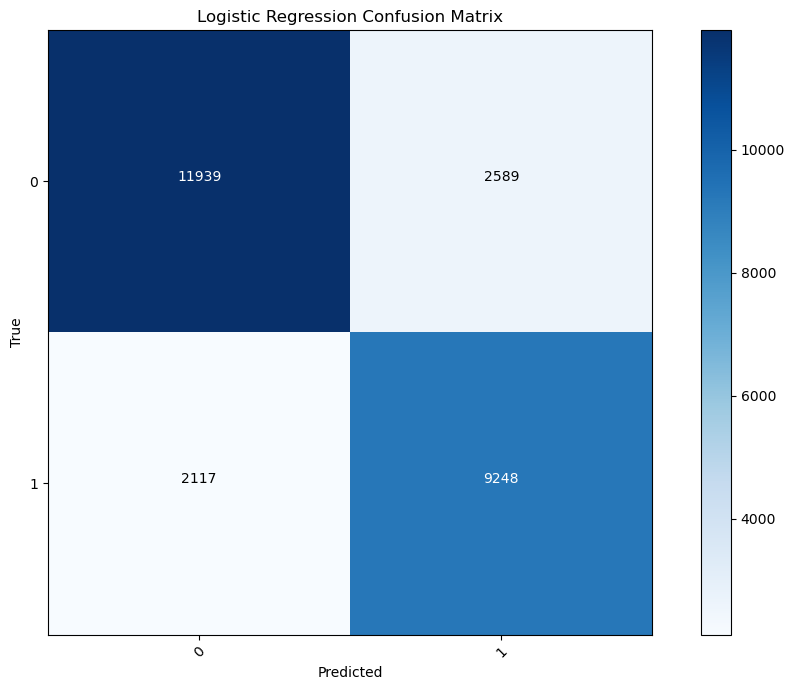

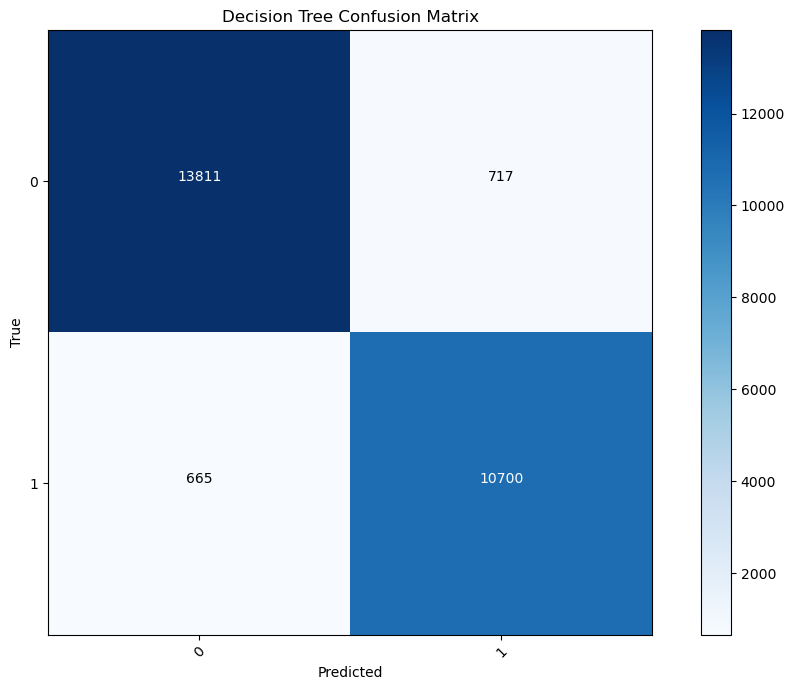

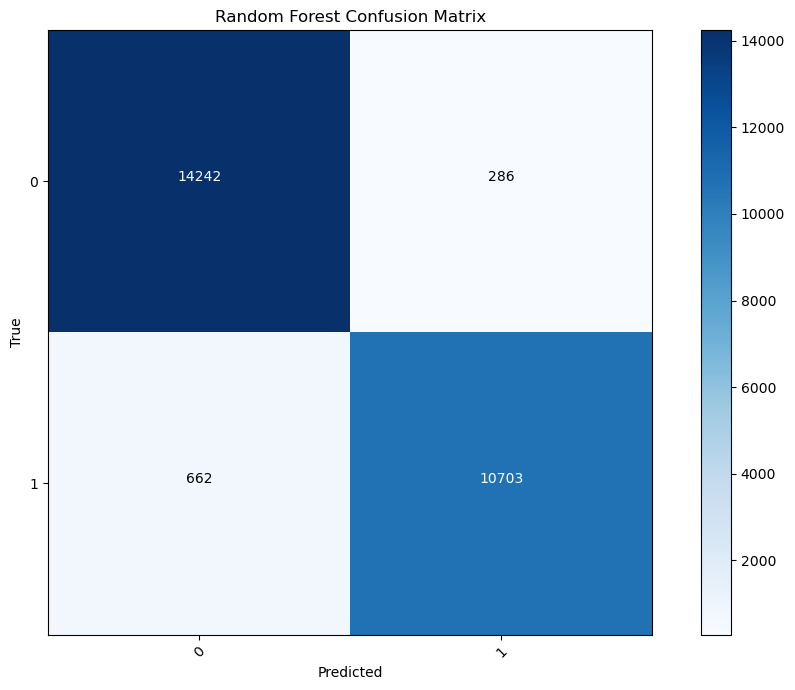

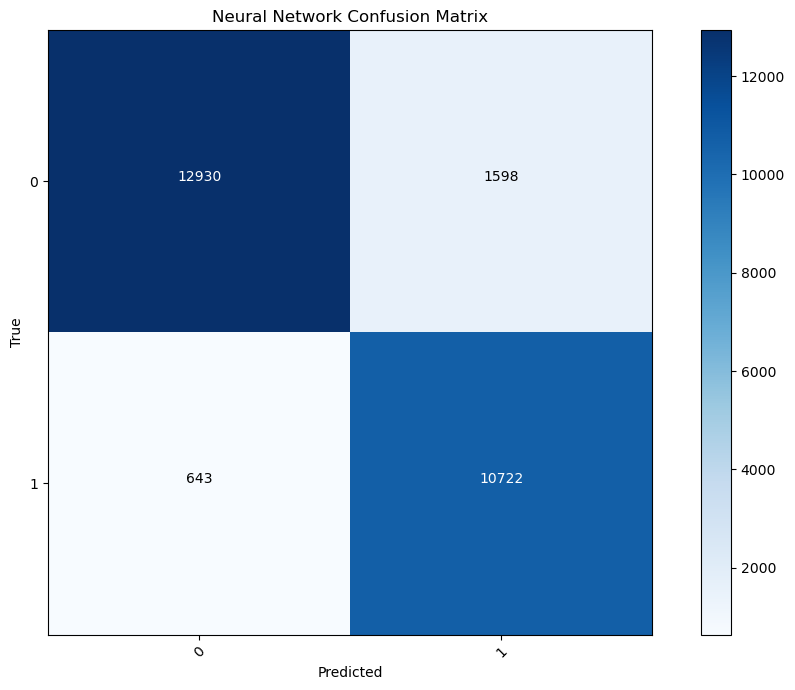

In [9]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, name):
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix with imshow
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')

    # Add color bar
    plt.colorbar()

    # Set ticks
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))

    # Add annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)


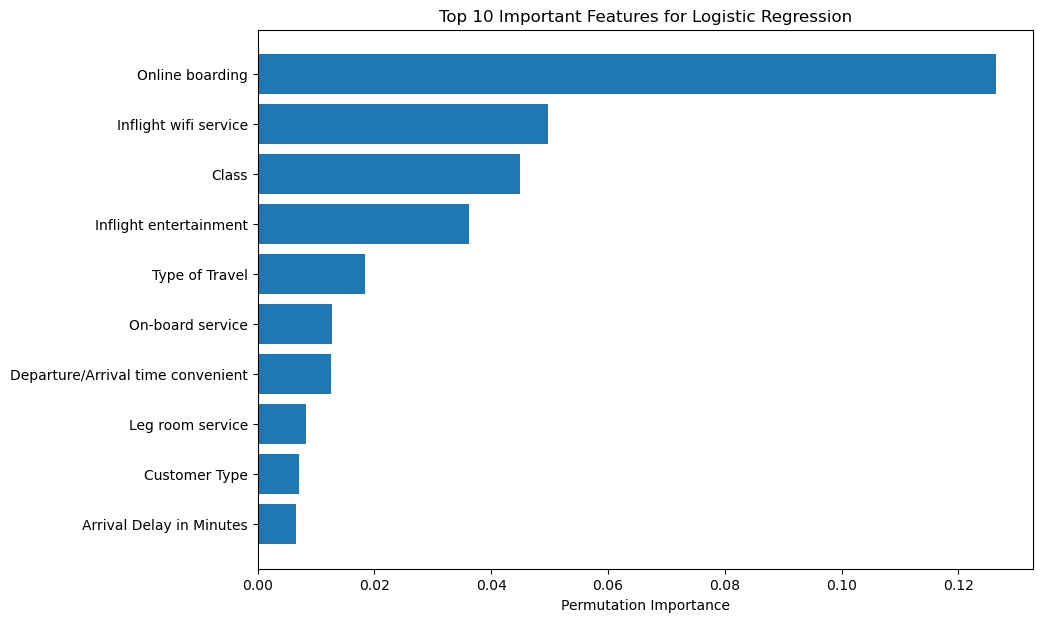

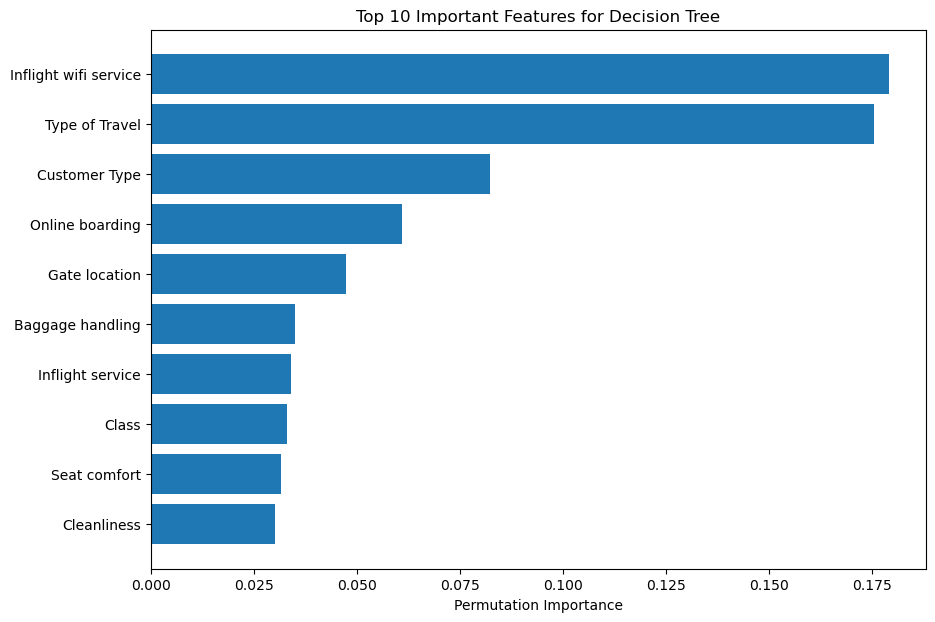

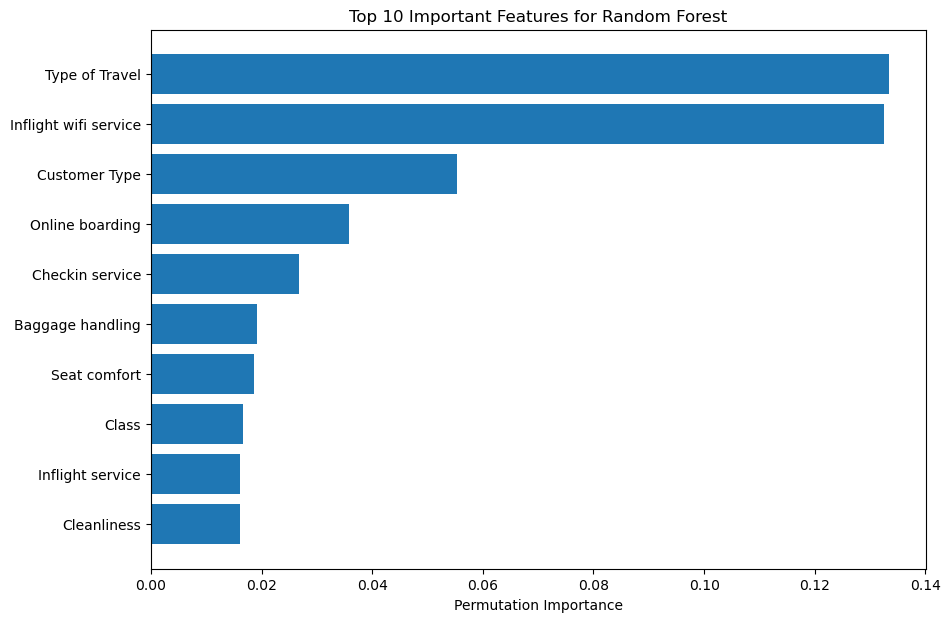

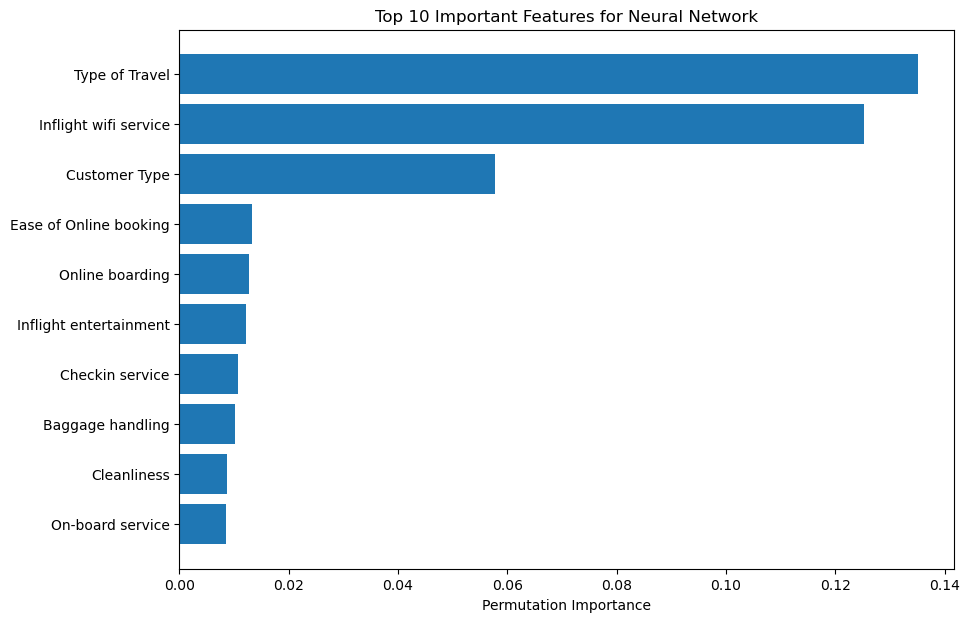

In [10]:
from sklearn.inspection import permutation_importance

# Function to plot top N important features using permutation importance
def plot_permutation_importance(model, X_test, y_test, name, top_n=10):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    sorted_idx = result.importances_mean.argsort()[-top_n:]
    plt.figure(figsize=(10, 7))
    plt.barh(range(top_n), result.importances_mean[sorted_idx], align='center')
    plt.yticks(range(top_n), [X_test.columns[i] for i in sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.title(f'Top {top_n} Important Features for {name}')
    plt.show()

# Plot top 10 important features using permutation importance for each model
for name, model in models.items():
    plot_permutation_importance(model, X_test, y_test, name, top_n=10)
